<!-- # CMPUT 200 Winter 2023  Ethics of Data Science and AI
 -->
# Lab 4:  Applying Basic Data Science Methods

***
- **FIRST name**: Abimbola
- **LAST name**: Olarinde
- **Student ID**: 1880229

Leave blank if individual:
- **Collaborator names**:
- **Collaborator student IDs**:
***

In today's lab, you will learn how to:
1. apply the data science methods learnt in labs 1-3.

For this lab, you will need four datasets: <code>population.csv</code>, <code>child_mortality.csv</code>, <code>fertility.csv</code>, and <code>life_expectancy.csv</code>. To upload them to your notebook, click on the **Files** button on the left side of your screen. Next click on the **Upload** icon near the top and select the two datasets.

### Instructions

- **Collaboration**: You must submit your own work. The collaboration policy for the labs is Consultation Collaboration. You may verbally discuss concepts with your classmates, without exchanging written text, code, or detailed advice. You must develop your own solution and submit your own work. All sources of information used including books, websites, students you talked to, must be cited in the submission. Please see the course FAQ document for details on this collaboration policy. We will adhere to current Faculty of Science guidelines on dealing with suspected cases of plagiarism.
- **Software**: We highly recommend that students use Google Colab for completing labs and assignments. This is the software used by the TAs in the course, and we can guarantee that there will be no issues with incompatible environments or imports.
- **Filling out the Notebook**: You must use this notebook to complete your lab. You will execute the questions in the notebook. The questions might ask for a short answer in text form or for you to write and execute a piece of code. Make sure you enter your answer in either case only in the cell provided.
- **Important**:  Do not use a different cell, do not delete cells, and do not create a new cell. Creating new cells for your code is not compatible with the auto-grading system we are using and thus your assignment will not get grading properly and you will lose marks for that question. As a reminder you must remove the raise NotImplementedError() statements from each question when answering.
- **Rules for Datasets**: Any datasets used in the lab cannot be imported from cloud storage, e.g google drive, and must be read from a file either on your local computer or uploaded to the google colab notebook. Importing from cloud storage will result in a zero.
- **Submission Formatting**: When you are done, you will submit your work from the notebook. Make sure to save your notebook before running it, and then submit on Canvas the notebook file with your work completed. Name your file with your Student ID number, followed by an underscore and L plus the lab number (ex: 1234567_L4.ipynb). Failure to do so will result in your final score being reduced by 50%! Finally your name must be written at the top of the lab or assignment document.

In [99]:
# Run this cell to set up; Please don't change this cell.

import numpy as np
from numpy.random import default_rng
rng = default_rng()
import pandas as pd

from scipy.optimize import minimize

# These lines do some fancy plotting magic.
import matplotlib
# This is a magic function that renders the figure in the notebook, instead of displaying a dump of the figure object.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Part 1:  Population

The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.


In this section, we will examine some of the factors that influence population growth and how they are changing around the world.

The first dataframe we will consider is the total population of each country over time. Run the cell below.

In [100]:
population = pd.read_csv('population.csv', header=0)
population.drop(population.index[(population["time"] >= 2021)],axis=0,inplace=True)
population.shape

(43537, 3)

### Haiti

In the `population` dataframe, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. We will begin by taking a close look at Haiti. Use the ISO link to find the 3-letter code for Haiti.

**Question 1.** Create a dataframe called `h_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1970 through 2020 (including both 1970 and 2020) and the second should contain the population of Haiti in each of those years.

In [101]:
# YOUR CODE HERE
filtered_column = population[(population['geo'] == 'hti') & (population['time'] >= 1970 ) & (population['time'] <= 2020 )]
h_pop = filtered_column[['time', 'population_total']]
#h_pop.drop(h_pop.index[((h_pop['time'] < 1970) | (h_pop['time'] > 2020)) & (h_pop['geo'] != 'hti')], inplace=True)
h_pop.shape
h_pop


,time,population_total
23046,1970,4676237
23047,1971,4757175
23048,1972,4837334
23049,1973,4918625
23050,1974,5003708
23051,1975,5094570
23052,1976,5191637
23053,1977,5294625
23054,1978,5404020
23055,1979,5520187


In [102]:
#TEST CELL: do not delete!

Run the following cell to create a dataframe called `h_decade` that has the population of Haiti for every ten years starting in 1970 and going up to 2020. At a glance, it appears that the population of Haiti has been growing quickly indeed!

In [103]:
tens = np.arange(1970,2021,10)
h_decade = h_pop.loc[h_pop['time'].isin(tens)]
h_decade

,time,population_total
23046,1970,4676237
23056,1980,5643175
23066,1990,7037915
23076,2000,8463802
23086,2010,9949318
23096,2020,11402533


**Question 2.** Assign `initial` to an array that contains the population for every ten year interval from 1970 to 2010. Then, assign `changed` to an array that contains the population for every ten year interval from 1980 to 2020. You should use the `h_decade` table to create both arrays, first filtering the table to only contain the relevant years.

The annual growth rate for a time period is equal to:

$$(\frac{\text{Population at end of period}}{\text{Population at start of period}}^{\frac{1}{\text{number of years}}} )-1$$

We have provided the code below that uses  `initial` and `changed` in order to add a column to `h_decade` called `annual_growth`. Don't worry about the calculation of the growth rates; run the test below to test your solution.

In [104]:
# YOUR CODE HERE
tens_inital = np.arange(1970,2011,10) # to get the range from 1970 to 2010
tens_changed = np.arange(1980,2021,10) # to get the range from 1980 to 2020
filtered_initial = h_decade[h_decade['time'].isin(tens_inital)] 
filtered_changed = h_decade[h_decade['time'].isin(tens_changed)]


initial = filtered_initial['population_total'].values # an initial array with the population values
changed = filtered_changed['population_total'].values # an changed array with the population values

growth_rates = ((changed/initial)**0.1)-1

h_1970_through_2010 = h_decade.loc[h_decade['time'] <= 2010]
h_decade_growth = h_1970_through_2010.assign(annual_growth = growth_rates)

In [105]:
#TEST CELL: do not delete!

While the population has grown every decade since 1970, the annual growth rate decreased dramatically from 1980 to 2020. Let's look at some other information in order to develop a possible explanation. Run the next cell to load three additional dataframes of measurements about countries over time.

In [106]:
life_expectancy = pd.read_csv('life_expectancy.csv', header=0)
life_expectancy.drop(life_expectancy.loc[life_expectancy['time'] >= 2021].index, inplace=True)

child_mortality = pd.read_csv('child_mortality.csv', header=0)
child_mortality.drop(child_mortality.loc[child_mortality['time'] >= 2021].index, inplace=True)
child_mortality.rename(columns={"child_mortality_0_5_year_olds_dying_per_1000_born":"child_mortality_under_5_per_1000_born"}, inplace=True)

fertility = pd.read_csv('fertility.csv', header=0)
fertility.drop(fertility.loc[fertility['time'] >= 2021].index, inplace=True)

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

Run the following cells below to see `life_expectancy`, `child_mortality`, and `fertility`. Refer back to these tables as they will be helpful for answering further questions!

In [107]:
life_expectancy

,geo,time,life_expectancy_years
0,afg,1800,28.21
1,afg,1801,28.20
2,afg,1802,28.19
3,afg,1803,28.18
4,afg,1804,28.17
...,...,...,...
56045,zwe,2016,60.52
56046,zwe,2017,61.35
56047,zwe,2018,61.74
56048,zwe,2019,62.04


In [108]:
child_mortality

,geo,time,child_mortality_under_5_per_1000_born
0,afg,1800,468.58
1,afg,1801,468.58
2,afg,1802,468.58
3,afg,1803,468.58
4,afg,1804,468.58
...,...,...,...
57412,zwe,2016,50.36
57413,zwe,2017,49.31
57414,zwe,2018,46.23
57415,zwe,2019,44.43


In [109]:
fertility

,geo,time,children_per_woman_total_fertility
0,abw,1800,5.64
1,abw,1801,5.64
2,abw,1802,5.64
3,abw,1803,5.64
4,abw,1804,5.64
...,...,...,...
60630,zwe,2016,3.76
60631,zwe,2017,3.68
60632,zwe,2018,3.61
60633,zwe,2019,3.53


**Question 3.** Perhaps population is growing more slowly because people aren't living as long. Use the `life_expectancy` table to draw a line graph with the years 1970 and later on the horizontal axis that shows how the *life expectancy at birth* has changed in Haiti.

<!--
BEGIN QUESTION
name: q1_3
manual: true
-->
<!-- EXPORT TO PDF -->

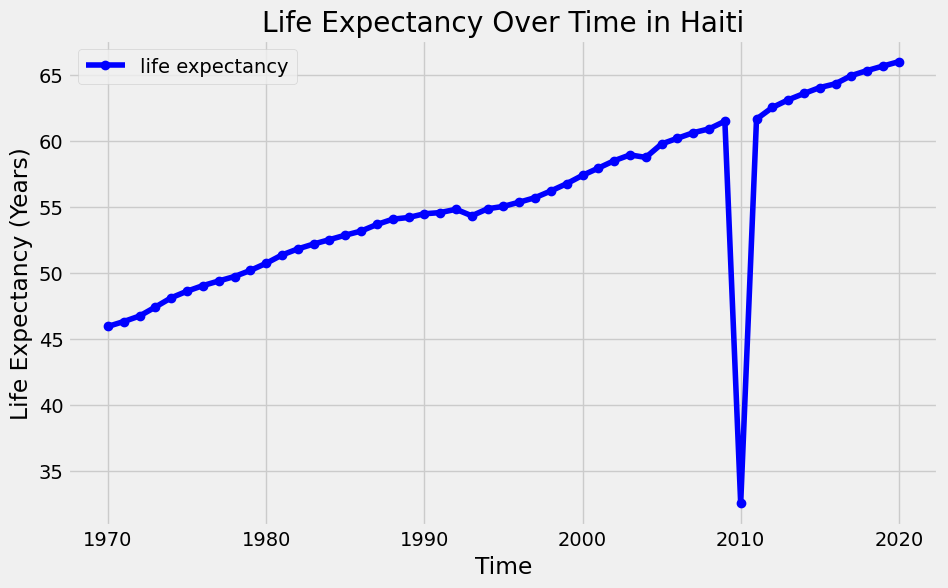

In [110]:
# YOUR CODE HERE
needed_column = life_expectancy[(life_expectancy['geo']=='hti') & (life_expectancy['time'] >= 1970)] 
# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(needed_column['time'], needed_column['life_expectancy_years'], marker='o', linestyle='-', color='b', label='life expectancy')
plt.xlabel('Time')
plt.ylabel('Life Expectancy (Years)')
plt.title('Life Expectancy Over Time in Haiti')
plt.legend()
plt.grid(True)
plt.show()
 

**Question 4.** Assuming everything else stays the same, do the trends in life expectancy in the graph above directly explain why the population growth rate decreased from 1980 to 2020 in Haiti? Why or why not?

Hint: What happened in Haiti in 2010, and does that event explain the overall change in population growth rate?

<!--
BEGIN QUESTION
name: q1_4
manual: true
-->
<!-- EXPORT TO PDF -->

YOUR ANSWER HERE::


No, the trends in life expectancy alone do not directly explain why the population growth rate decreased from 1980 to 2020 in Haiti. Life expectancy is only one factor influencing population growth; other factors such as birth rates, migration, and external events also play a role. 

The graph shows a sharp drop in life expectancy around 2010, which aligns with the devastating earthquake that struck Haiti that year. This event likely caused a temporary decline in population due to high mortality rates. However, the overall decline in population growth rate over the decades is more likely due to say demographic trends, such as decreasing birth rates in the country, economic conditions, just changes in life expectancy.

The `fertility` data contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49.

**Question 5.** Write a function `fertility_over_time` that takes the Alpha-3 code of a `country` and a `start` year. The function will be used to generate a line chart of the country's fertility rate each year, starting at the `start` year. The plot should include the `start` year and all later years that appear in the `fertility` table.


In [111]:
def fertility_over_time(country, start):
    # YOUR CODE HERE
    """ Function that takes the Alpha-3 code of a `country` and a `start` year. The function is used to generate a line chart of the country's fertility rate each year, starting at the `start` year
    param;
    country(str); Alpha-3 code of the country
    start(int);  Start year

    returns;
    Returns filtered fertility data for the given country and start year.

    """

    
    return fertility[(fertility['geo'] == country) & (fertility['time'] >= start)]
    


In [112]:
#TEST CELL: do not delete!

**Question 5.1.**Then, in the next cell, call your `fertility_over_time` function on the Alpha-3 code for Haiti and the year 1970 in order to plot how Haiti's fertility rate has changed since 1970. Note that the function `fertility_over_time` should not return the plot itself. **The expression that draws the line plot is provided for you; please don't change it.**

<Axes: xlabel='geo'>

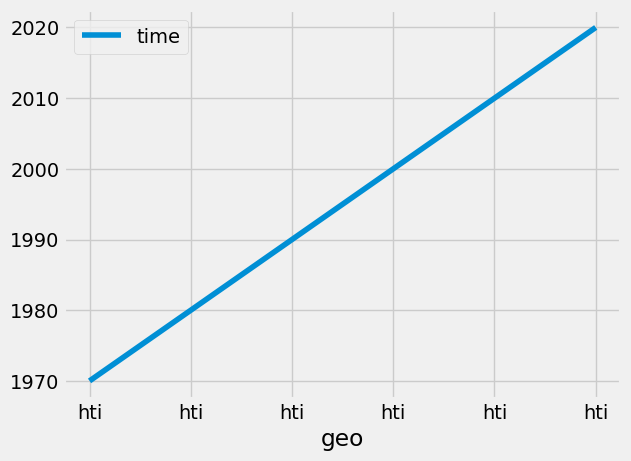

In [113]:
# YOUR CODE HERE
haiti_code = "hti"


fertility_over_time(haiti_code, 1970).plot(0, 1) # You should *not* change this line.

It has been observed that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. We can see if this association is evident in Haiti by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

**Question 6.** Using both the `fertility` and `child_mortality` data, draw a scatter diagram that has Haiti's total fertility on the horizontal axis and its child mortality on the vertical axis with one point for each year, starting with 1970.

**The expression that draws the scatter diagram is provided for you; please don't change it.** Instead, create a dataframe called `post_1969_fertility_and_child_mortality` with the appropriate column labels and data in order to generate the chart correctly.

<Axes: xlabel='Children per Woman', ylabel='Child Deaths per 100 Born'>

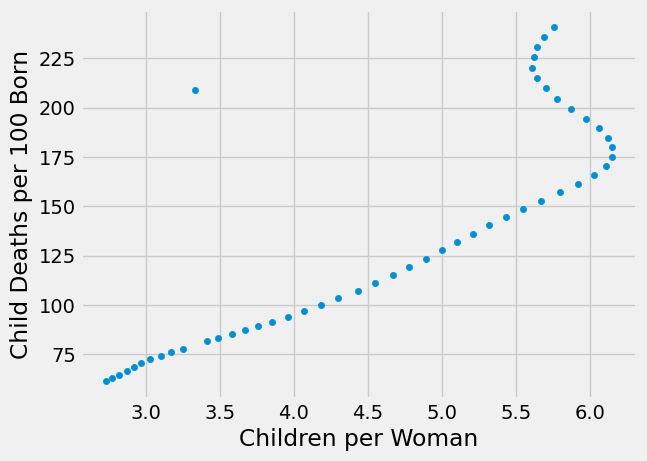

In [116]:
# YOUR CODE HER
needed_column_fertility= fertility[(fertility['geo']=='hti') & (fertility['time'] >= 1970)]
needed_column_child_mortality= child_mortality[(child_mortality['geo'] == 'hti') & (child_mortality['time'] >= 1970)]
# To merge both filters with the common coloumn creiteria 'geo' = 'hti' and 'time' >= '1970'
post_1969_fertility_and_child_mortality = pd.merge(needed_column_fertility, needed_column_child_mortality, on=['geo', 'time'])
# Don't change this line!
post_1969_fertility_and_child_mortality.plot.scatter(
    "children_per_woman_total_fertility",
    "child_mortality_under_5_per_1000_born",
    xlabel="Children per Woman",
    ylabel="Child Deaths per 100 Born"
)


**Question 7.** In one or two sentences, describe the association (if any) that is illustrated by this scatter diagram. Does the diagram show that reduced child mortality causes parents to choose to have fewer children? Beyond the general association, are there any irregularities or odd points that would be worth investigating?


YOUR ANSWER HERE:

The scatter plot shows a positive correlation between child mortality and birth rates, but it does not prove causation. Other factors may influence both, and outliers should be examined.

# Rubric

| Question | Points|
|----------|----------|
| 1.   | 5   |
| 2.    | 10   |
| 3.    | 10   |
| 4.   | 10   |
| 5.    | 15  |
| 5.1    | 5  |
| 6.    | 15   |
| 7.   | 5   |
| Total  | 75   |



Population data: [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md).